In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy.linalg as la
from sklearn import preprocessing
%matplotlib inline

#### 1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

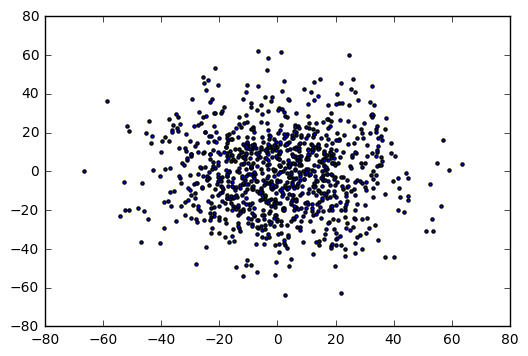

In [41]:
muX = 0
sigmaX = 20

muY = 0 
sigmaY = 20

amount = 1000

# зададим нормально распределенную случайную величину
norm_rvX = sts.norm(loc=muX, scale=sigmaX)
norm_rvY = sts.norm(loc=muY, scale=sigmaY)

# сгенерируем 1000 значений
x = norm_rvX.rvs(size=amount)
y = norm_rvY.rvs(size=amount)
plt.scatter(x, y, marker='.')
#plt.axis('equal')

#### 2.Нарисовать плотность распределения полученной выборки x.

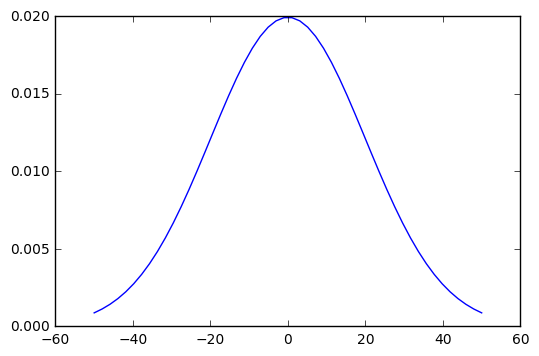

In [42]:
var = np.linspace(-50,50)
plt.plot(var, norm_rvX.pdf(var))

#### 3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки. Построить график зависимости (корелляции) x от y.

(-8000.0, 8000.0, -8000.0, 8000.0)

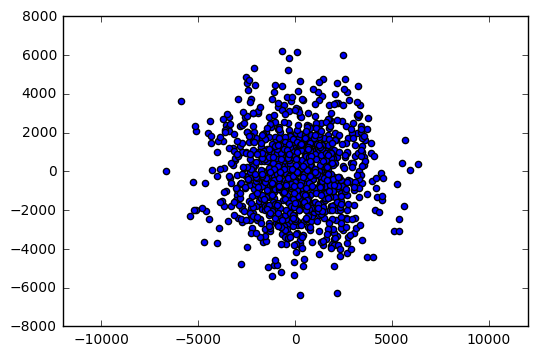

In [60]:
X = np.vstack((x, y)).T
# Матрица масштабирования
sx, sy = 100, 100
Scale = np.array([[sx, 0], [0, sy]])
# Умножаем матрицу на исходную матрицу
Y = X.dot(Scale)
plt.scatter(Y[:, 0], Y[:, 1])
plt.axis('equal')

#### 5. Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.

Мат. ожидание осталось прежним, а вот расброс значений увеличился в 100 раз.

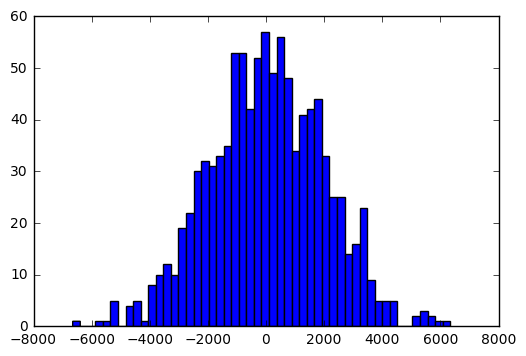

In [61]:
plt.hist(Y[:, 0],50)
plt.show()  

#### 6. Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?

In [63]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Y[:, 0], Y[:, 1])
print(corr)
# положительная корреляция - с ростом х растет у
# отрициательная корреляция - с ростом х уменьшается у
# 0 - у - это константа

-0.0278779255945


#### 7. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?



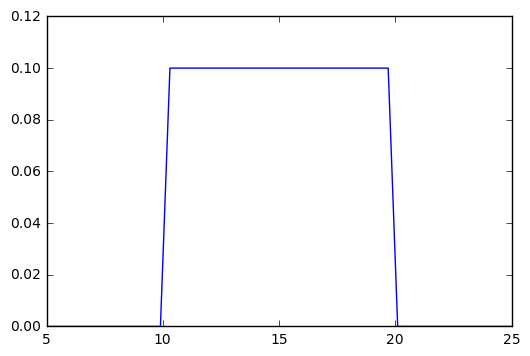

In [159]:
a = 10
b = 20
# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(100)

x = np.linspace(5, 25)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

# В нормальном распределении есть одно самое популярное значения, чем дальше от этого значения, 
# тем ниже его кол-во в выборке. В равномерном распределении каждое значение (от 10 до 20) встречается одинаковое 
#кол-во раз, их вероятности одинаковые.

#### 8. Найти на графике примеры выброса. Что они означают?

0, 40, 79, 82 - точки с такими координатами х - это выбросы. 
Это какие-то нетипичные кейсы, которые стали результатом ошибки измерения или связаны с нестанартными ситуациями.

#### 9. Найти корелляцию в следующих данных:

In [162]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [ ]:
Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price.
Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [163]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


In [169]:
avocado = df_norm[0]
avg_price = df_norm[1]
corr, p_value = pearsonr(avocado, avg_price)
print(corr)

-0.208317048488


Чем больше куплено этих авокадо, тем меньше средняя стоимость. 